In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
from urllib.request import urlopen

url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'

resp = urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)

In [5]:
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

In [6]:
sobelx = np.absolute(sobelx)
sobely = np.absolute(sobely)
sobelx = np.uint8(255 * sobelx / np.max(sobelx))
sobely = np.uint8(255 * sobely / np.max(sobely))

sobel_combined = cv2.bitwise_or(sobelx, sobely)

In [7]:
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
laplacian = np.absolute(laplacian)
laplacian = np.uint8(255 * laplacian / np.max(laplacian))

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [225, 138, 128],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[ 82,  21,  55],
        [ 81,  20,  54],
        [ 92,  28,  62],
        ...,
        [175,  71,  82],
        [175,  68,  78],
        [175,  65,  74]],

       [[ 80,  18,  55],
        [ 81,  19,  56],
        [ 96,  32,  66],
        ...,
        [177,  69,  82],
        [181,  71,  80],
        [183,  72,  81]],

       [[ 81,  19,  56],
        [ 83,  21,  58],
        [ 98,  34,  68],
        ...,
        [176,  68,  81],
        [183,  72,  81],
        [188,  74,  84]]], dtype=uint8)
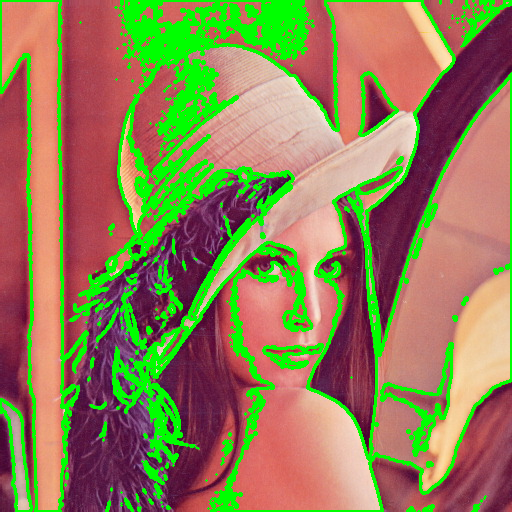

In [8]:
_, thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_image = image_rgb.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

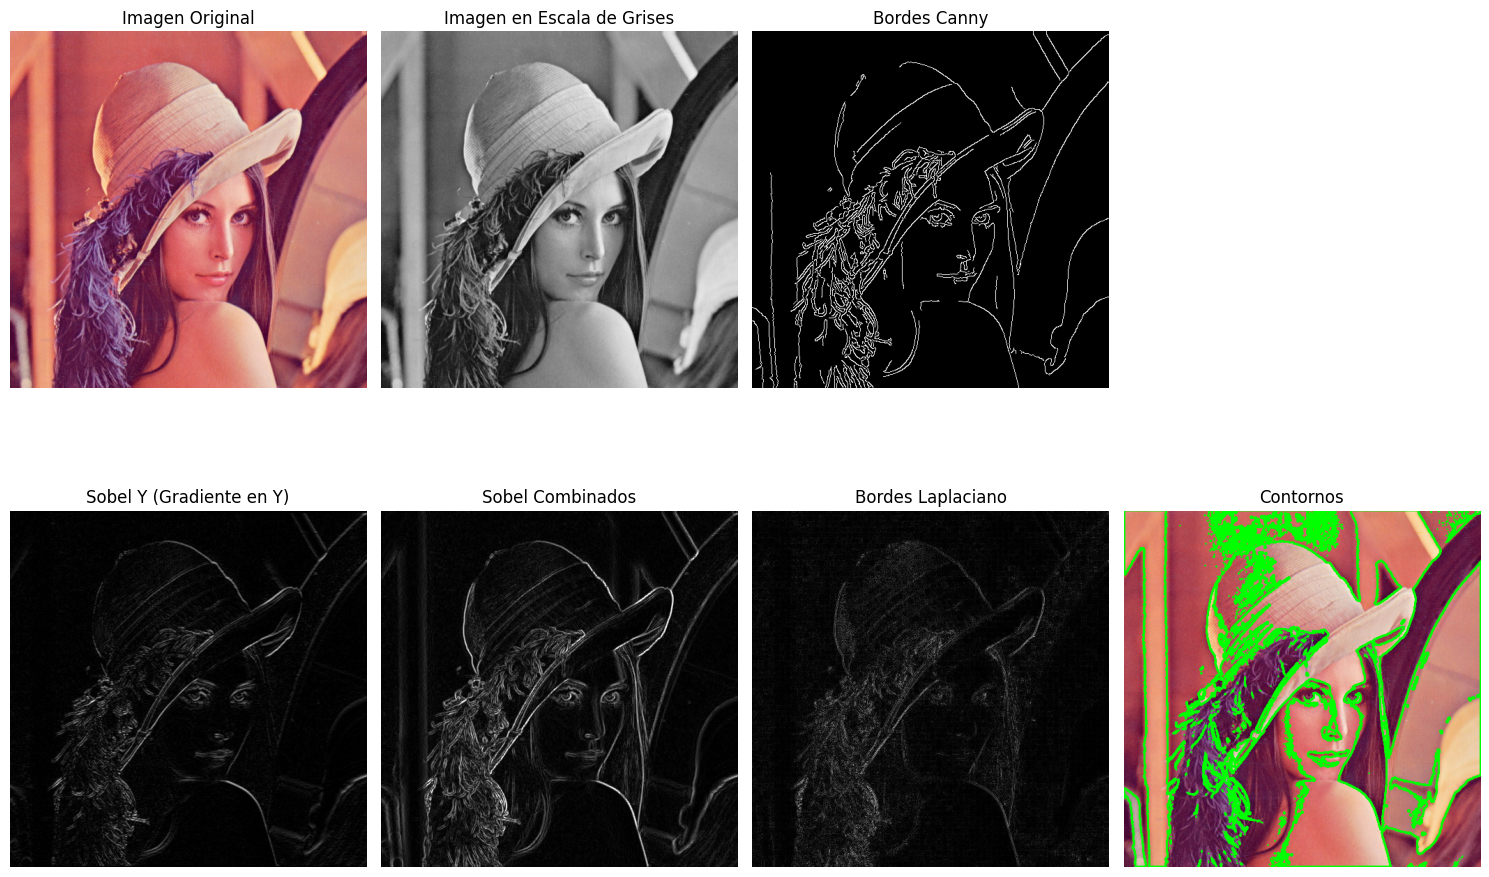

In [9]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1)
plt.title('Imagen Original')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title('Imagen en Escala de Grises')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title('Bordes Canny')
plt.imshow(edges, cmap='gray')
plt.axis('off')


plt.subplot(2, 4, 5)
plt.title('Sobel Y (Gradiente en Y)')
plt.imshow(sobely, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title('Sobel Combinados')
plt.imshow(sobel_combined, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title('Bordes Laplaciano')
plt.imshow(laplacian, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.title('Contornos')
plt.imshow(contour_image)
plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
print("Método de detección de bordes: ")
print("1. Canny: Algoritmo multi-etapa que detecta bordes fuertes y débiles. Es robusto al ruido")
print("2. Sobel: Calcula gradientes en direccionees X e Y, detectando cambios de intesidad ")
print("3. Laplaciano: Detecta áreas donde la intensidad cambia rápidamente usando la segunda derivada")
print("4. Contornos: Detecta curvas que unen puntos continuos con el mismo color o intensidad")
print(f"Número de contornos encontrados: {len(contours)}")

Método de detección de bordes: 
1. Canny: Algoritmo multi-etapa que detecta bordes fuertes y débiles. Es robusto al ruido
2. Sobel: Calcula gradientes en direccionees X e Y, detectando cambios de intesidad 
3. Laplaciano: Detecta áreas donde la intensidad cambia rápidamente usando la segunda derivada
4. Contornos: Detecta curvas que unen puntos continuos con el mismo color o intensidad
Número de contornos encontrados: 1141
